In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and inspect the dataset
file_path = '../Dataset.csv'
data = pd.read_csv(file_path)

print("First five rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nDescriptive statistics for numerical and categorical columns:")
print(data.describe(include='all'))

First five rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas

In [4]:
# Check for missing values
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
# Fill missing categorical values with the mode
data['Cuisines'] = data['Cuisines'].fillna(data['Cuisines'].mode()[0])

In [6]:
# Check for missing values
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


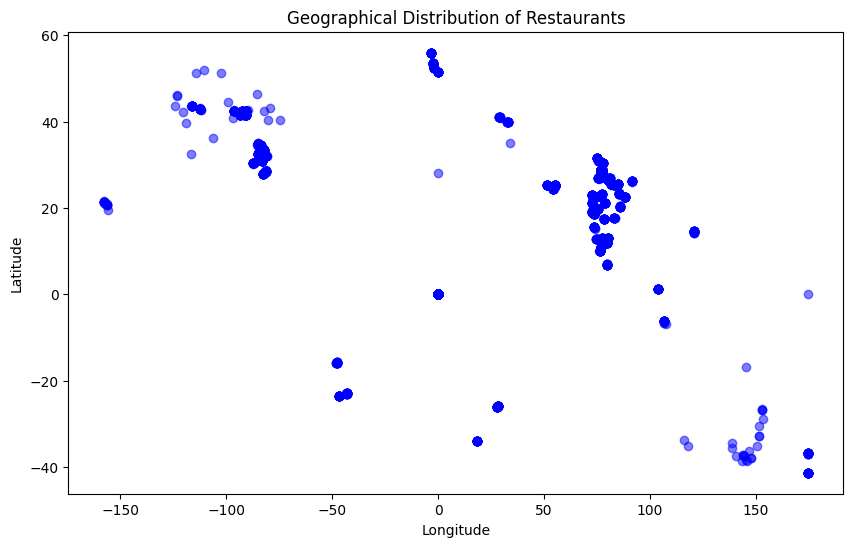

In [9]:
# Scatter plot for restaurant locations
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5, c='blue')
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
# Group by city and calculate statistics
city_grouped = data.groupby('City').agg(
    total_restaurants=('Restaurant ID', 'count'),
    avg_rating=('Aggregate rating', 'mean'),
    avg_price_range=('Price range', 'mean'),
    common_cuisines=('Cuisines', lambda x: x.mode()[0] if not x.isnull().all() else 'Unknown')
).reset_index()

# Sort cities by the number of restaurants for further analysis
top_cities = city_grouped.sort_values(by='total_restaurants', ascending=False).head(10)

print("\nTop 10 Cities with Most Restaurants (Statistics):")
print(top_cities)


Top 10 Cities with Most Restaurants (Statistics):
            City  total_restaurants  avg_rating  avg_price_range  \
88     New Delhi               5473    2.438845         1.621597   
50       Gurgaon               1118    2.651431         1.855993   
89         Noida               1080    2.036204         1.601852   
43     Faridabad                251    1.866932         1.454183   
48     Ghaziabad                 25    2.852000         1.800000   
17  Bhubaneshwar                 21    3.980952         1.857143   
69       Lucknow                 21    4.195238         2.571429   
51      Guwahati                 21    4.190476         2.523810   
2      Ahmedabad                 21    4.161905         2.571429   
5       Amritsar                 21    3.685714         1.809524   

                                     common_cuisines  
88                                      North Indian  
50                                      North Indian  
89                                 

C:\Users\rahul\AppData\Local\Temp\ipykernel_11468\3379102162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='total_restaurants', palette='mako')


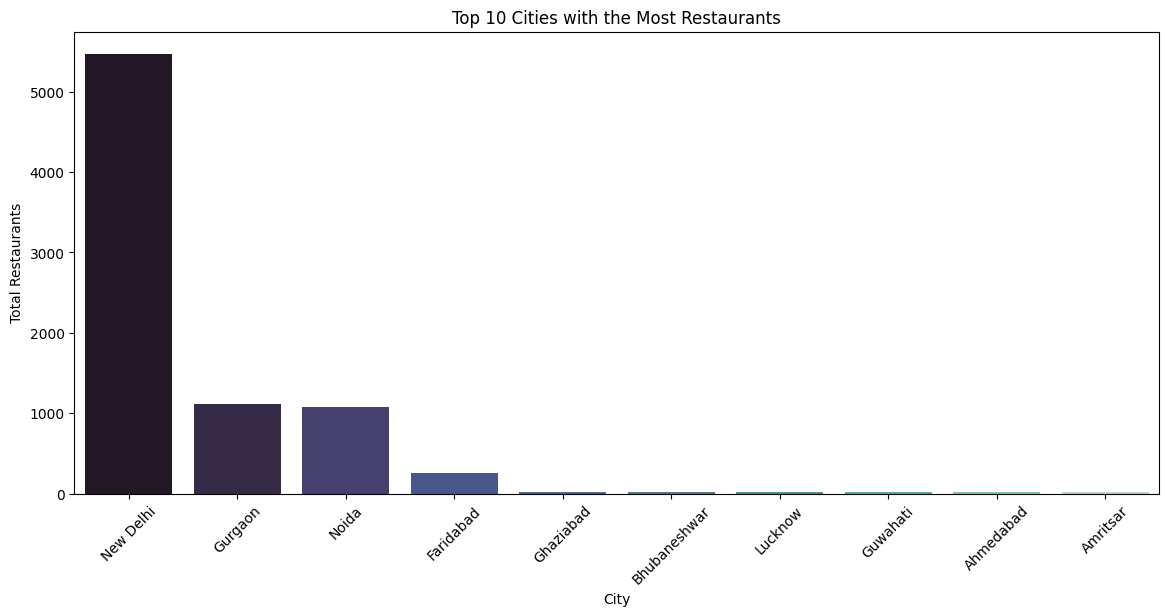

In [11]:
# Plot the top 10 cities with the most restaurants
plt.figure(figsize=(14, 6))
sns.barplot(data=top_cities, x='City', y='total_restaurants', palette='mako')
plt.title('Top 10 Cities with the Most Restaurants')
plt.xlabel('City')
plt.ylabel('Total Restaurants')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Display statistics for top cities
print("\nStatistics for Top Cities:")
print(top_cities[['City', 'total_restaurants', 'avg_rating', 'avg_price_range', 'common_cuisines']])


Statistics for Top Cities:
            City  total_restaurants  avg_rating  avg_price_range  \
88     New Delhi               5473    2.438845         1.621597   
50       Gurgaon               1118    2.651431         1.855993   
89         Noida               1080    2.036204         1.601852   
43     Faridabad                251    1.866932         1.454183   
48     Ghaziabad                 25    2.852000         1.800000   
17  Bhubaneshwar                 21    3.980952         1.857143   
69       Lucknow                 21    4.195238         2.571429   
51      Guwahati                 21    4.190476         2.523810   
2      Ahmedabad                 21    4.161905         2.571429   
5       Amritsar                 21    3.685714         1.809524   

                                     common_cuisines  
88                                      North Indian  
50                                      North Indian  
89                                      North Indian  
43 